Qtd de vetores de suporte 99


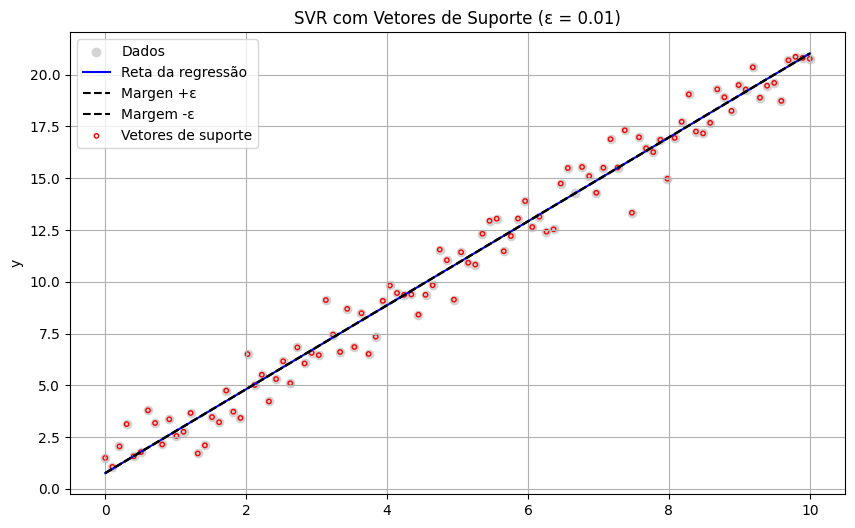

Qtd de vetores de suporte 84


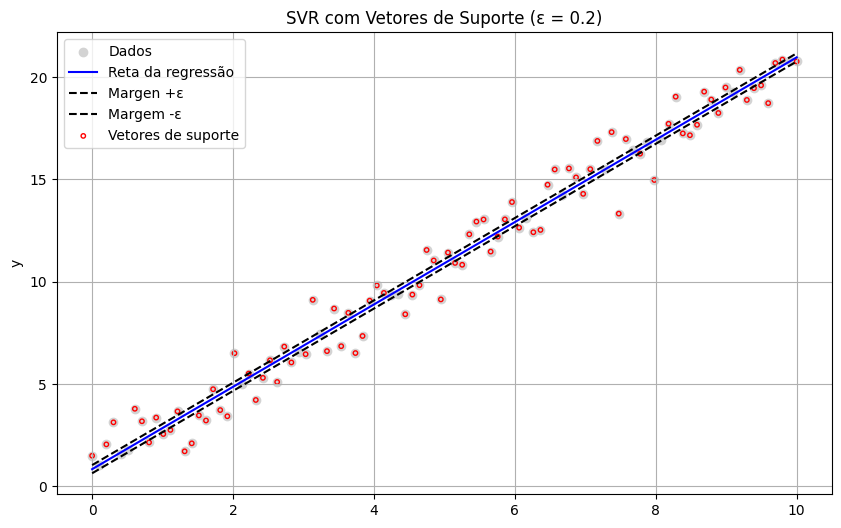

Qtd de vetores de suporte 29


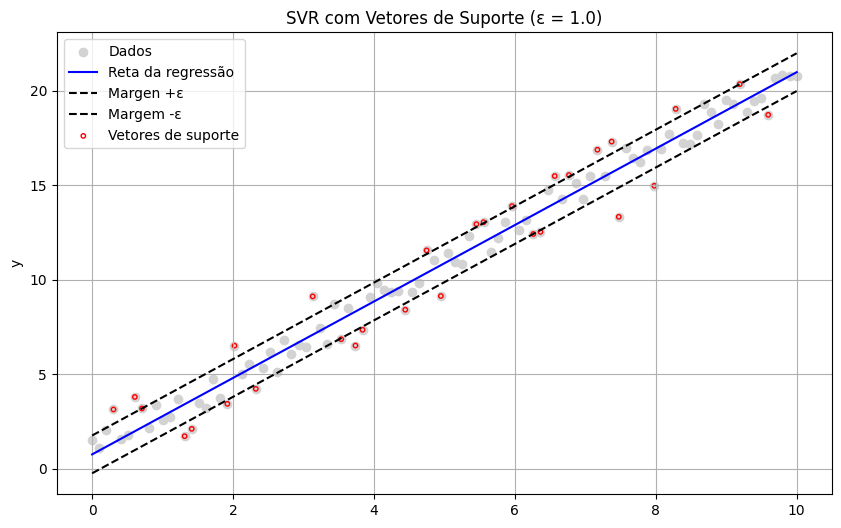

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from helpers import synthetic_data


epsilons = (0.01, 0.2, 1.0)

X, y = synthetic_data.generate_linear_data(2.0, 1.0, 100)

svr = SVR(kernel="linear")

for e in epsilons:
    svr.epsilon = e
    svr.fit(X, y)
    y_pred = svr.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='lightgray', label='Dados')
    plt.plot(X, y_pred, color="blue", label="Reta da regressão")
    plt.plot(X, y_pred + e, "k--", label="Margen +ε")
    plt.plot(X, y_pred - e, "k--", label="Margem -ε")

    print(f"Qtd de vetores de suporte {len( svr.support_vectors_ )}")

    support_X = X[svr.support_] # svr.support_ retorna os índices dos vetores de suporte
    support_y = y[svr.support_]
    plt.scatter(support_X, support_y, facecolors='none', edgecolors='red', s=10, label='Vetores de suporte')

    plt.ylabel("y")
    plt.title(f"SVR com Vetores de Suporte (ε = {e})")
    plt.legend()
    plt.grid(True)
    plt.show()


<h4>O que acontece com o número de vetores de suporte à medida que ε aumenta?</h4>
 
> R: O número de vetores de suporte tende a diminuir com o aumento do parâmetro ε, pois a faixa de tolerância ao erro se amplia, fazendo com que menos pontos violem essa margem e, portanto, contribuam ativamente para o modelo.


<h4>O ajuste do modelo fica mais ou menos sensível ao ruído?</h4>

> R: Fica menos sensível a ruídos, tendo em vista que a faixa de tolerância ao erro se amplia.